# Author  Surya S Kumar



# TSF GRIP TaSK -2

## Prediction using Unsupervised ML

(LEVEL- Begineer)

### K-Means of Clustering

From the given 'iris' dataset,predict the optimum number of clusters and represent it visually.

 Dataset : https://bit.ly/3kXTdox
 


In [24]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn import datasets


# Loading Dataset

In [11]:
iris = datasets.load_iris()
ir_df = pd.DataFrame(iris.data, columns = iris.feature_names)
ir_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
ir_df.shape

(150, 4)

In [13]:
ir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
ir_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
ir_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Text(0.5, 1.0, 'Iris Scatter Plot')

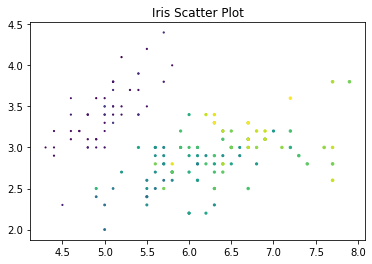

In [16]:
x= ir_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[:,0],x[:,1],x[:,2],x[:,3])
plt.title('Iris Scatter Plot')


## Finding optimum number of clusters

In [18]:
x = ir_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Plotting the results 

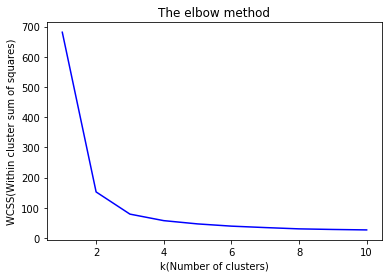

In [23]:
plt.plot(range(1, 11), wcss,color='blue')
plt.title('The elbow method')
plt.xlabel('k(Number of clusters)')
plt.ylabel('WCSS(Within cluster sum of squares)')
plt.show()

## Creating K means classifier

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visualizing Clusters

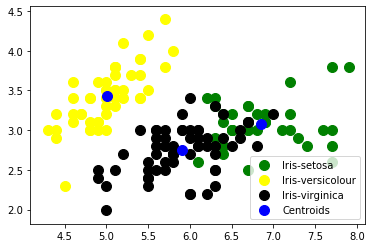

In [22]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()